In [49]:
import pandas as pd

In [50]:
file = '2023_temp_data.csv'
df = pd.read_csv(file, index_col=0, parse_dates=True)
df

,Temperature
Datetime,
2023-01-01 01:00:00,3.5
2023-01-01 02:00:00,3.2
2023-01-01 03:00:00,3.4
2023-01-01 04:00:00,3.2
2023-01-01 05:00:00,1.8
...,...
2023-12-31 19:00:00,9.6
2023-12-31 20:00:00,11.4
2023-12-31 21:00:00,11.0


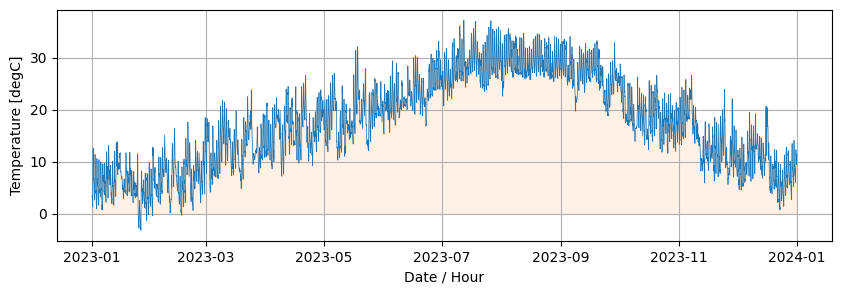

In [54]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,3)
fig, ax = plt.subplots()
ax.plot(df, lw=0.5, c='C0')
ax.fill_between(df.index, df['Temperature'], color='C1', alpha=0.1)
ax.set_xlabel('Date / Hour')
ax.set_ylabel('Temperature [degC]')
ax.grid()
plt.savefig('temperature_002.png')
plt.show()

In [82]:
import numpy as np

area_est = np.mean(df['Temperature']) * 365
print('mean * 365 days : %.3f' % area_est)

mean * 365 days : 6459.058


計算する面積の大きさが、概ね、平均気温 × 一年の日数（≈ 6459）程度になるように、x軸の日付を UNIX タイムスタンプに変換して 24 * 60 * 60 秒で割っておきます。

In [55]:
x = np.array([t.timestamp() / (24 * 60 * 60) for t in df.index])
y = np.array(df['Temperature'])

SciPy の台形公式 (integrate.trapezoid) とシンプソンの公式 (integrate.simpson) による数値積分を利用して面積を計算します。

In [77]:
from scipy import integrate

area1 = integrate.trapezoid(y, x=x)
print('Trapezoidal rule : %.3f' % area1)

area2 = integrate.simpson(y, x=x)
print('Simpson\'s rule   : %.3f' % area2)

Trapezoidal rule : 6458.052
Simpson's rule   : 6458.646
